In [48]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from itertools import permutations 
from scipy import stats
import random


import importlib, importlib.util

def module_from_file(module_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

# Classification Task

## Perceptron with Sigmoidal Activation Function

### Linear Dataset

In [77]:
pct = module_from_file("myclasses", "perceptrons.py")

In [50]:
class ReadData(object):
    
    def __init__(self, data, filepath, files):
        
        files = [filepath + '/' + file for file in files]
        self.files = files
        
        for i in range(len(files)):
            
            class_i = pd.read_csv(files[i], sep = ' ', header = None)
            data.append(class_i.values)
            
        self.data = data

        
    def kClass(self, k):
        return self.data[k]  


    def plotData(self):
        
        for i in range(len(self.files)):
            class_label = 'Class' + str(i+1)
            plt.scatter(self.kClass(i)[:,0], self.kClass(i)[:,1], label = class_label)

        plt.legend()    
        plt.show() 


    def train_validation_test_split(self, perTrain, perVal, perTest):
        
        train_data = []
        val_data = []
        test_data = []
        
        n = len(self.files)
        
        for i in range(n):
            
            train, test = train_test_split(self.kClass(i), test_size=perTest, random_state=42, shuffle=True)
            train, val = train_test_split(train, test_size = (perVal/(perVal + perTrain)), random_state=42, shuffle=True)
            
            train_data.append(train)
            val_data.append(val)
            test_data.append(test)
            
        return train_data, val_data, test_data

In [51]:
data = []
filenames = ['Class1.txt', 'Class2.txt', 'Class3.txt']
dataset = ReadData(data, 'Dataset/Classification/LS_Group17', filenames)

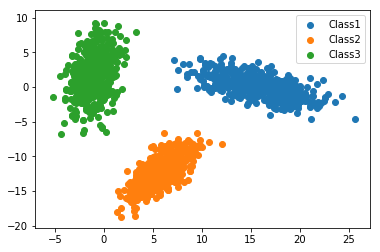

In [52]:
dataset.plotData()

In [53]:
trainData, valData, testData = dataset.train_validation_test_split(0.6,0.2,0.2)

In [63]:
weights = []
multiPerceptron = pct.MultiPerceptrons(weights, 2, 'logistic')

For Classes 0 1


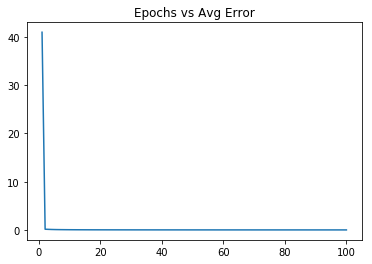

For Classes 0 2


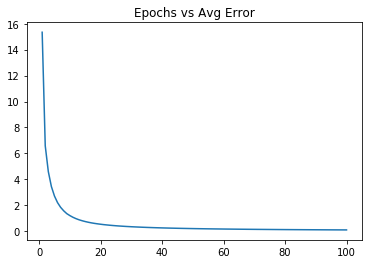

For Classes 1 2


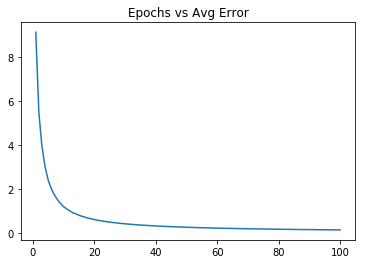

In [64]:
W = multiPerceptron.fit(trainData, 0.4, 0.3, 100, 3)

In [65]:
train_acc , val_acc, test_acc = multiPerceptron.accuracy(W, trainData, 3), multiPerceptron.accuracy(W, valData, 3), multiPerceptron.accuracy(W, testData, 3)
print('Train Accuracy: %.2f \nValidation Accuracy: %.2f \nTest Accuracy: %.2f' %(train_acc, val_acc, test_acc))

Train Accuracy: 100.00 
Validation Accuracy: 100.00 
Test Accuracy: 100.00


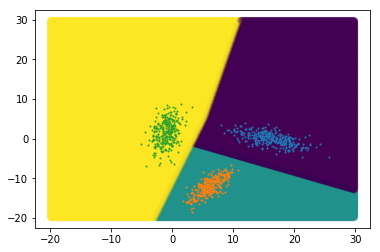

In [66]:
multiPerceptron.decisionPlot(W, -20, 30, 3, trainData)

### Non-Linear Dataset

In [67]:
class ReadData(object):
    
    def __init__(self, data, filepath, K, NEachClass):
        
        self.K = K
        self.NEachClass = NEachClass
        
        L = NEachClass[:]
        L.insert(0, 0)
        
        for i in range(K):
            
            class_i = pd.read_csv(filepath, sep = ' ', header = None, skiprows = 1 + L[i], usecols = [0,1], nrows =L[i+1])
            data.append(class_i.values)
            
        self.data = data

        
    def kClass(self, k):
        return self.data[k]  


    def plotData(self):
        
        for i in range(self.K):
            class_label = 'Class' + str(i+1)
            plt.scatter(self.kClass(i)[:,0], self.kClass(i)[:,1], label = class_label, s = 2)

        plt.legend()    
        plt.show() 


    def train_validation_test_split(self, perTrain, perVal, perTest):
        
        train_data = []
        val_data = []
        test_data = []
        
        n = self.K
        
        for i in range(n):
            
            train, test = train_test_split(self.kClass(i), test_size=perTest, random_state=42, shuffle=True)
            train, val = train_test_split(train, test_size = (perVal/(perVal + perTrain)), random_state=42, shuffle=True)
            
            train_data.append(train)
            val_data.append(val)
            test_data.append(test)
            
        return train_data, val_data, test_data

In [68]:
data = []
file =  'Dataset/Classification/NLS_Group17.txt' 
dataset = ReadData(data, file, 3, [300, 500, 1000])

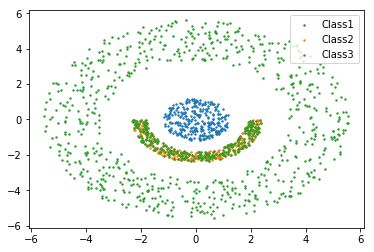

In [69]:
dataset.plotData()

In [70]:
trainData, valData, testData = dataset.train_validation_test_split(0.6,0.2,0.2)

In [71]:
weights = []
multiPerceptron = pct.MultiPerceptrons(weights, 2, 'logistic')

For Classes 0 1


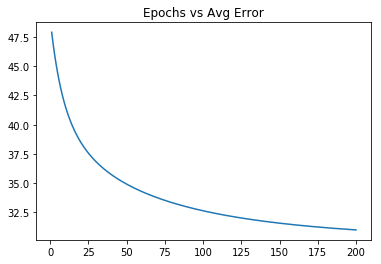

For Classes 0 2


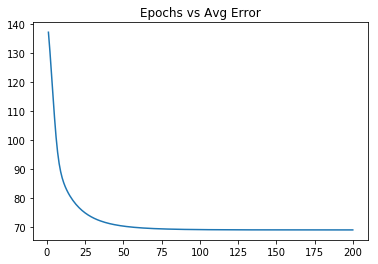

For Classes 1 2


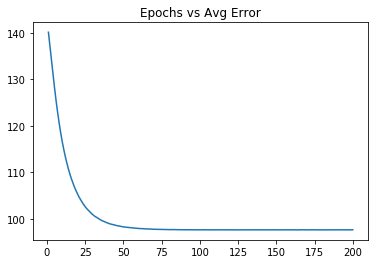

In [73]:
W = multiPerceptron.fit(trainData, 0.009, 0.3, 200, 3)

In [74]:
train_acc , val_acc, test_acc = multiPerceptron.accuracy(W, trainData, 3), multiPerceptron.accuracy(W, valData, 3), multiPerceptron.accuracy(W, testData, 3)
print('Train Accuracy: %.2f \nValidation Accuracy: %.2f \nTest Accuracy: %.2f' %(train_acc, val_acc, test_acc))

Train Accuracy: 55.56 
Validation Accuracy: 55.56 
Test Accuracy: 55.56


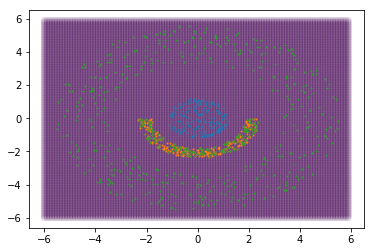

In [75]:
multiPerceptron.decisionPlot(W, -6, 6, 3, trainData)

#### In the above part, if we divide data into [300, 800, 700] then it would give a better solution with separating boundaries between two classes.